In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile
import warnings
warnings.filterwarnings("ignore")

from prophet import Prophet

ModuleNotFoundError: No module named 'prophet'

In [2]:
# autoload modules
%load_ext autoreload
%autoreload 2

In [3]:
print(dir(get))

['SCADA', 'WTPHM', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'get_anomaly_detection', 'get_vibration', 'os', 'pd']


## Data Import

### Anomaly Detection Data

In [2]:
# Access zip file

# windfarm_path = 'data/anomaly_detection_data'
# 
# # There are three wind farms A, B and C zip folders.
# for file in os.listdir(windfarm_path):
#     if file.endswith('.zip'):
#         with zipfile.ZipFile(os.path.join(windfarm_path, file), 'r') as zip_ref:
#             zip_ref.extractall(windfarm_path)
#     else:
#         continue

In [4]:
wfa_df = pd.read_csv('data/anomaly_detection_data/Wind Farm A/datasets/0.csv', sep=';')
wfb_df = pd.read_csv('data/anomaly_detection_data/Wind Farm B/datasets/2.csv', sep=';')
wfc_df = pd.read_csv('data/anomaly_detection_data/Wind Farm C/datasets/1.csv', sep=';')

In [5]:
wfa_df.head()

,time_stamp,asset_id,id,train_test,status_type_id,sensor_0_avg,sensor_1_avg,sensor_2_avg,wind_speed_3_avg,wind_speed_4_avg,...,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,sensor_52_avg,sensor_52_max,sensor_52_min,sensor_52_std,sensor_53_avg
0,2021-08-03 06:10:00,0,0,train,0,22.0,302.9,129.4,1.7,1.7,...,-496.0,0.0,0.0,-1280.0,-496.0,0.0,0.0,0.0,0.0,26.0
1,2021-08-03 06:20:00,0,1,train,0,22.0,307.1,133.6,1.7,1.7,...,-490.0,0.0,0.0,-1278.0,-490.0,0.0,0.0,0.0,0.0,25.0
2,2021-08-03 06:30:00,0,2,train,0,22.0,340.6,167.1,0.9,0.9,...,-490.0,0.0,0.0,-1356.0,-490.0,0.0,0.0,0.0,0.0,25.0
3,2021-08-03 06:40:00,0,3,train,0,22.0,124.4,-49.1,1.5,1.5,...,-509.0,0.0,0.0,-1274.0,-509.0,0.0,0.0,0.0,0.0,26.0
4,2021-08-03 06:50:00,0,4,train,0,22.0,66.2,-107.3,1.0,1.0,...,-499.0,0.0,0.0,-1284.0,-499.0,0.0,0.0,0.0,0.0,26.0


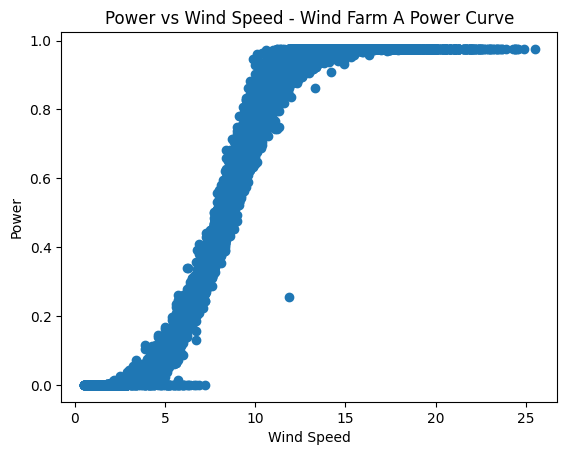

In [6]:
# plot scatter plot of power vs wind speed

plt.scatter(wfa_df['wind_speed_3_avg'], wfa_df['power_29_avg'])
plt.title('Power vs Wind Speed - Wind Farm A Power Curve')
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.show()

In [7]:
wfb_df.head()

,time_stamp,asset_id,id,train_test,status_type_id,sensor_0_avg,sensor_0_max,sensor_0_min,sensor_0_std,sensor_1_avg,...,wind_speed_60_min,wind_speed_60_std,wind_speed_61_avg,wind_speed_61_max,wind_speed_61_min,wind_speed_61_std,power_62_avg,power_62_max,power_62_min,power_62_std
0,2025-08-07 19:20:00,13,0,train,0,0.0,0.0,0.0,0.0,0.0,...,2.19,7.94,15.05,18.60,1.42,10.54,1.029635,1.070432,0.015368,0.990874
1,2025-08-07 19:30:00,13,1,train,0,0.0,0.0,0.0,0.0,0.0,...,2.05,7.13,14.56,18.48,1.41,9.88,1.028465,1.064535,0.014818,0.995832
2,2025-08-07 19:40:00,13,2,train,0,0.0,0.0,0.0,0.0,0.0,...,2.26,5.80,13.40,17.55,1.61,9.04,1.029716,1.079160,0.014253,0.998465
3,2025-08-07 19:50:00,13,3,train,0,0.0,0.0,0.0,0.0,0.0,...,2.29,6.23,14.43,18.40,1.55,9.35,1.029089,1.071266,0.014855,0.978003
4,2025-08-07 20:00:00,13,4,train,0,0.0,0.0,0.0,0.0,0.0,...,2.18,5.80,14.34,17.68,1.40,9.82,1.028390,1.063132,0.014044,0.995906


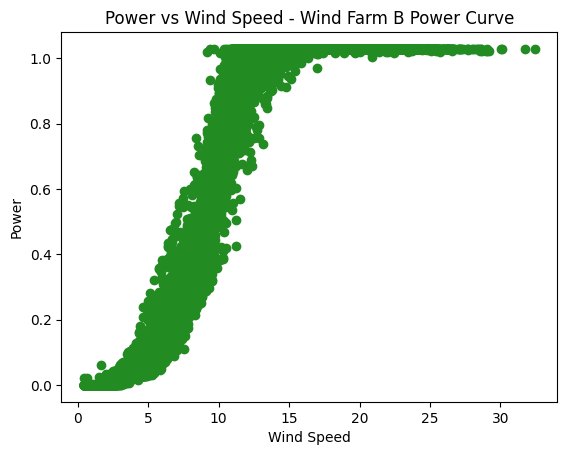

In [8]:
plt.scatter(wfb_df['wind_speed_59_avg'], wfb_df['power_58_avg'], color='forestgreen')
plt.title('Power vs Wind Speed - Wind Farm B Power Curve')
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.show()

In [9]:
wfc_df.head()

,time_stamp,asset_id,id,train_test,status_type_id,sensor_0_avg,sensor_0_max,sensor_0_min,sensor_0_std,sensor_1_avg,...,wind_speed_236_min,wind_speed_236_std,wind_speed_235_avg,wind_speed_235_max,wind_speed_235_min,wind_speed_235_std,wind_speed_237_avg,wind_speed_237_max,wind_speed_237_min,wind_speed_237_std
0,2025-09-30 00:00:00,53,0,train,0,58.710,63.1,55.3,1.378,0.0011,...,10.7,2.055,-14.9,-14.9,-14.9,0.0,19.056,24.9,10.7,2.055
1,2025-09-30 00:10:00,53,1,train,0,58.711,63.1,55.6,1.391,-0.0041,...,7.7,2.075,-14.9,-14.9,-14.9,0.0,18.868,25.1,7.7,2.075
2,2025-09-30 00:20:00,53,2,train,0,58.696,63.4,55.3,1.376,0.0014,...,11.1,1.832,-14.9,-14.9,-14.9,0.0,19.284,24.0,11.1,1.832
3,2025-09-30 00:30:00,53,3,train,0,58.759,63.1,55.6,1.353,-0.0039,...,11.0,1.816,-14.9,-14.9,-14.9,0.0,19.420,23.9,11.0,1.816
4,2025-09-30 00:40:00,53,4,train,0,58.684,63.1,54.9,1.421,0.0102,...,10.2,1.959,-14.9,-14.9,-14.9,0.0,18.059,23.1,10.2,1.959


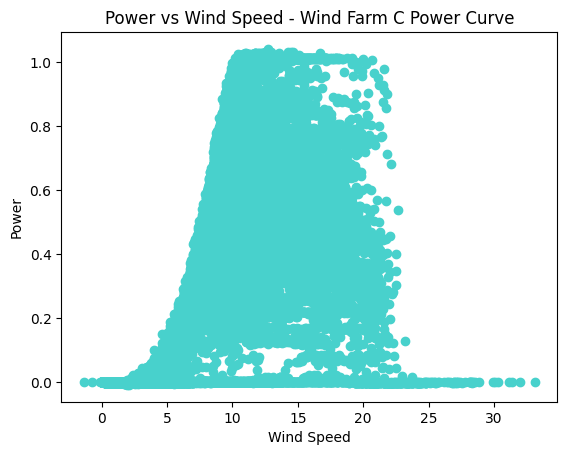

In [10]:
plt.scatter(wfc_df['wind_speed_236_avg'], wfc_df['power_6_avg'], color='mediumturquoise')
plt.title('Power vs Wind Speed - Wind Farm C Power Curve')
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.show()

### Vibration Data

In [11]:
# Import excel file as pandas dataframe

# Store files in a dictionary
fault_path = 'data/vibration_analysis_data'
data_dict = {}

for file in os.listdir(fault_path):
    if file.endswith('.csv'):
        # noinspection PyTypeChecker
        data_dict[file] = pd.read_csv(os.path.join(fault_path, file), sep=';')
    elif file.endswith('.xlsx'):
        data_dict[file] = pd.read_excel(os.path.join(fault_path, file))
    else:
        continue

In [12]:
data_dict.keys()

dict_keys(['crack fault state-Vw=4.5.csv', 'crack fault-Vw=4.csv', 'Crack Fault-Vw=5.4.csv', 'Crack Fault-Vw=5.csv', 'Crack State-Vw=1.3.csv', 'Crack state-Vw=2.8.csv', 'Crack state-Vw=3.3.csv', 'Erosion fault state-Vw=1.3.csv', 'Erosion fault state-Vw=2.1.csv', 'Erosion fault state-Vw=2.8.csv', 'Erosion Fault state-Vw=3.4.csv', 'Erosion Fault State-Vw=4.2.csv', 'Erosion fault state-Vw=5.3.csv', 'Erosion Fault state-Vw=5.csv', 'H for Vw=2.3.csv', 'H-for Vw=1.3.csv', 'H-for-Vw=3.2.csv', 'H-for-Vw=3.7.csv', 'H-for-Vw=4.5.csv', 'H-for-Vw=5.csv', 'H-Vw=5.3.csv', 'twist fault when Vw=1.3.xlsx', 'twist fault when Vw=4.7.xlsx', 'twist fault when Vw=5.3.xlsx', 'twist fault when Vw=5.xlsx', 'twist fault when Vwind=4.xlsx', 'twist faultwhenVw=3.2.xlsx', 'twsist faut when Vw=2.xlsx', 'unbalance fault state-Vw=3.4.csv', 'unbalance fault state-Vw=4.2.csv', 'unbalance fault state-Vw=4.7.csv', 'unbalance fault state-Vw=5.csv', 'unbalance fault state=Vw=2.3.csv', 'UnbalanceState-Vw=1.3.csv', 'unbalnce

### SCADA Data

In [21]:
SCADA = get.SCADA(verbose=True)
scada_df, fault_df, status_df = SCADA.get_data()

Columns in status (before enforcing):  Index(['Time', 'Main Status', 'Sub Status', 'Full Status', 'Status Text', 'T',
       'Service', 'FaultMsg', 'Value0'],
      dtype='object')
Columns in status (after enforcing):  Index(['DateTime', 'Main Status', 'Sub Status', 'Full Status', 'Status Text',
       'T', 'Service', 'FaultMsg', 'Value0'],
      dtype='object')
Data imported successfully.


In [22]:
scada_df.head()

,DateTime,Time,Error,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,...,Rectifier cabinet temp.,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev
0,2014-05-01 00:00:00,1398920448,0,6.9,9.4,2.9,0.0,0.02,0.0,0,...,24,20,25,12,14,24,34,2501,25.272728,1.103713
1,2014-05-01 00:09:00,1398920960,0,5.3,8.9,1.6,0.0,0.01,0.0,0,...,24,20,25,12,14,24,34,2501,25.272728,1.103713
2,2014-05-01 00:20:00,1398921600,0,5.0,9.5,1.4,0.0,0.04,0.0,0,...,24,20,25,12,14,24,34,2501,25.272728,1.103713
3,2014-05-01 00:30:00,1398922240,0,4.4,8.3,1.3,0.0,0.08,0.0,0,...,23,21,25,12,14,24,34,2501,25.272728,1.103713
4,2014-05-01 00:39:00,1398922752,0,5.7,9.7,1.2,0.0,0.05,0.0,0,...,23,21,25,12,14,23,34,2501,25.272728,1.103713


In [23]:
status_df.head()

,DateTime,Main Status,Sub Status,Full Status,Status Text,T,Service,FaultMsg,Value0
0,2014-04-24 12:37:38,0,0,0 : 0,Turbine in operation,1,False,False,7.4
1,2014-04-25 19:27:24,71,104,71 : 104,Insulation monitoring : Insulation fault Phase U2,6,False,True,20.5
2,2014-04-26 09:30:13,8,0,8 : 0,Maintenance,6,True,False,17.1
3,2014-04-26 10:05:19,8,0,8 : 0,Maintenance,6,False,False,8.7
4,2014-04-26 10:05:25,8,0,8 : 0,Maintenance,6,True,False,10.6


In [24]:
fault_df.head()

,DateTime,Time,Fault
0,2014-05-14 14:39:44,1.400096e+09,GF
1,2014-05-14 14:50:24,1.400097e+09,GF
2,2014-05-14 14:58:56,1.400098e+09,GF
3,2014-05-14 15:09:36,1.400098e+09,GF
4,2014-05-14 15:20:16,1.400099e+09,GF


### WTPHM SCADA Data

In [47]:
wtphm_data = get.WTPHM()
scada_wtphm, events = wtphm_data.get_data()

In [49]:
events.head()

,turbine_num,code,time_on,time_off,duration,stop_cat,description
0,22,9,2015-11-01 00:03:56,2015-11-01 00:23:56,0 days 00:20:00,ok,description anonymised
1,21,93,2015-11-01 00:09:54,2015-11-01 00:10:56,0 days 00:01:02,ok,description anonymised
2,21,97,2015-11-01 00:10:56,2015-11-01 00:37:39,0 days 00:26:43,ok,description anonymised
3,22,165,2015-11-01 00:16:39,2015-11-06 05:03:35,5 days 04:46:56,ok,description anonymised
4,22,93,2015-11-01 00:23:56,2015-11-01 00:24:58,0 days 00:01:02,ok,description anonymised


In [26]:
scada_wtphm.head()

,time,turbine_num,wind_speed,kw,wind_speed_sd,wind_speed_max,torque_actual_value,blade_1_actual_angle,blade_2_actual_angle,blade_3_actual_angle,...,blade_3_1_act_angle_diff,ot,sot,dt,lot,wot,est,mt,rt,eect
0,2015-11-01 00:00:00,22,0.148473,0.009655,0.064693,0.110283,0.025785,0.458179,0.458418,0.036115,...,0.0,600.0,600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-11-01 00:10:00,22,0.125081,0.004962,0.066886,0.084016,0.020163,0.466428,0.465187,0.050519,...,0.0,236.0,600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-11-01 00:20:00,22,0.121183,0.004913,0.060307,0.086624,0.020841,0.473221,0.470761,0.062381,...,0.0,0.0,600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-11-01 00:30:00,22,0.137752,0.004454,0.067982,0.104322,0.020841,0.628920,0.598517,0.334251,...,0.0,0.0,600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-11-01 00:40:00,22,0.171540,0.040889,0.066886,0.113077,0.075126,0.460969,0.460708,0.040987,...,0.0,460.0,600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Exploratory Data Analysis

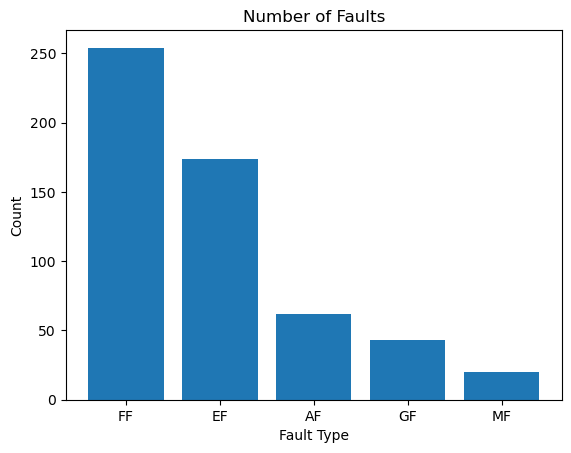

In [25]:
# Count the number of faults in the dataset and sort them in descending order
fault_count = fault_df['Fault'].value_counts()
fault_count.sort_values(ascending=False)

# Plot the number of faults
plt.bar(fault_count.index, fault_count.values)
plt.title('Number of Faults')
plt.xlabel('Fault Type')
plt.ylabel('Count')
plt.show()

There are five different types of faults.

- FF: feeding fault

- EF: excitation fault

- AF: air cooling fault

- GF: generator heating fault

- MF: mains failure fault

In [20]:
status_df.head()

,DateTime,Main Status,Sub Status,Full Status,Status Text,T,Service,FaultMsg,Value0
0,2014-04-24 12:37:38,0,0,0 : 0,Turbine in operation,1,False,False,7.4
1,2014-04-25 19:27:24,71,104,71 : 104,Insulation monitoring : Insulation fault Phase U2,6,False,True,20.5
2,2014-04-26 09:30:13,8,0,8 : 0,Maintenance,6,True,False,17.1
3,2014-04-26 10:05:19,8,0,8 : 0,Maintenance,6,False,False,8.7
4,2014-04-26 10:05:25,8,0,8 : 0,Maintenance,6,True,False,10.6


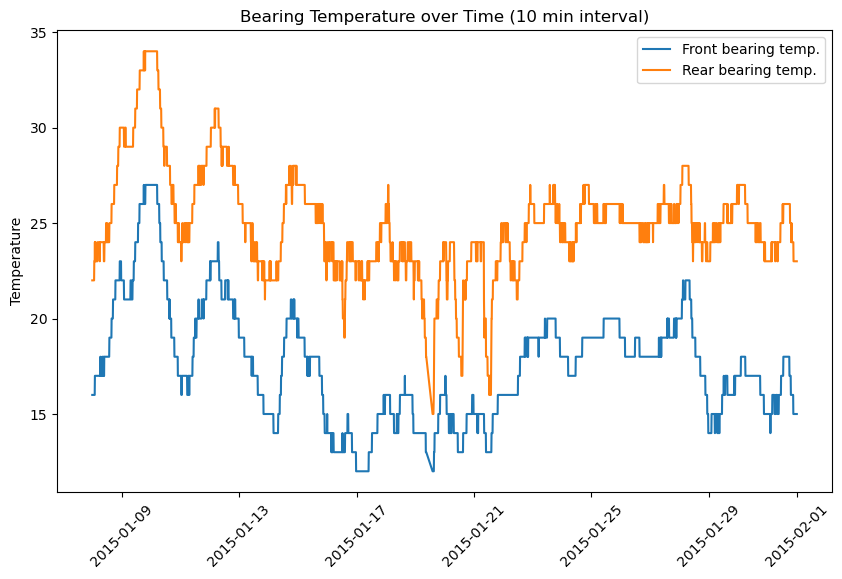

In [21]:
# Create a dataframe for one month of data
one_month_df = scada_df[(scada_df['DateTime'] >= '2015-01-08 00:00:00') & (scada_df['DateTime'] <= '2015-01-31 23:59:59')]

fig = plt.figure(figsize=(10, 6))
# Plot the temperature data over time
plt.plot(one_month_df['DateTime'], one_month_df['Front bearing temp.'])
plt.plot(one_month_df['DateTime'], one_month_df['Rear bearing temp.'])
plt.title('Bearing Temperature over Time (10 min interval)')
plt.ylabel('Temperature')
plt.legend(['Front bearing temp.', 'Rear bearing temp.'])
# angle the x-axis labels
plt.xticks(rotation=45)

plt.show()

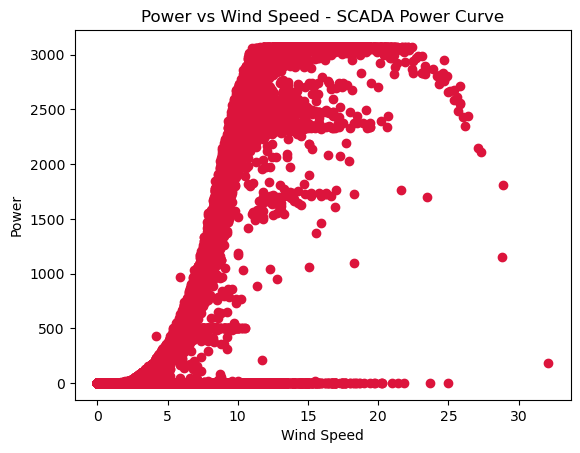

In [22]:
# Power Curve power vs wind speed

plt.scatter(scada_df['WEC: ava. windspeed'], scada_df['WEC: ava. Power'], color='crimson')
plt.title('Power vs Wind Speed - SCADA Power Curve')
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.show()


In [23]:
one_month_df.head()

,DateTime,Time,Error,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,...,Rectifier cabinet temp.,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev
35966,2015-01-08 00:00:00,1420696832,0,7.9,9.4,5.9,11.14,12.00,10.20,1078,...,25,21,25,10,19,25,39,3050,20.636364,1.361817
35967,2015-01-08 00:09:00,1420697344,0,7.8,10.1,5.5,10.93,12.38,10.07,1021,...,26,20,24,10,19,25,38,3050,20.636364,1.361817
35968,2015-01-08 00:19:00,1420697984,0,7.5,9.9,5.4,10.65,12.57,9.19,954,...,26,20,24,10,19,25,38,3050,20.727272,1.190874
35969,2015-01-08 00:30:00,1420698624,0,6.7,9.5,4.6,9.66,11.64,8.31,708,...,26,21,25,10,19,25,38,3050,21.000000,1.183216
35970,2015-01-08 00:38:00,1420699136,0,6.2,8.8,4.6,9.16,10.54,7.68,548,...,28,20,25,10,19,25,37,3050,21.000000,1.264911


### Utilization of the WTPHM Library

#### Grouping similar events

Note that the event has a code. This is code number would be unique to proprietary software and manufacturer. GE turbines will have different alarm codes from Vestas, or Siemens, etc. 

In [29]:
stop_codes = events[
    (events.stop_cat.isin(['maintenance', 'test', 'sensor', 'grid'])) |
    (events.stop_cat.str.contains('fault'))].code.unique()

pitch_code_groups = [[300, 301, 302], [400, 401], [500, 501, 502], [600, 601], [700, 701, 702]]
events[events.code.isin([i for s in pitch_code_groups for i in s])].head()

,turbine_num,code,time_on,time_off,duration,stop_cat,description
112,22,502,2015-11-01 21:04:26,2015-11-01 21:04:36,0 days 00:00:10,fault_pt,description anonymised pitch axis 3
114,22,601,2015-11-01 21:04:28,2015-11-01 21:04:36,0 days 00:00:08,fault_pt,description anonymised pitch axis 2
119,22,601,2015-11-01 21:04:36,2015-11-01 21:04:36,0 days 00:00:00,fault_pt,description anonymised pitch axis 2
131,22,600,2015-11-01 21:04:36,2015-11-01 21:04:36,0 days 00:00:00,fault_pt,description anonymised pitch axis 1
132,22,600,2015-11-01 21:04:36,2015-11-01 21:04:36,0 days 00:00:00,fault_pt,description anonymised pitch axis 1


In [30]:
# group the data
grouped_events, grouped_stop_codes = wtphm.batch.get_grouped_event_data(event_data=events, code_groups=pitch_code_groups, fault_codes=stop_codes)

grouped_events[grouped_events.code.isin(
    [i for s in pitch_code_groups for i in s])].head()

,turbine_num,code,time_on,time_off,duration,stop_cat,description
112,22,500,2015-11-01 21:04:26,2015-11-01 21:04:36,0 days 00:00:10,fault_pt,description anonymised pitch axis 1/2/3 (origi...
114,22,600,2015-11-01 21:04:28,2015-11-01 21:04:36,0 days 00:00:08,fault_pt,description anonymised pitch axis 1/2 (origina...
136,22,600,2015-11-01 21:04:36,2015-11-01 21:04:36,0 days 00:00:00,fault_pt,description anonymised pitch axis 1/2 (origina...
135,22,600,2015-11-01 21:04:36,2015-11-01 21:04:36,0 days 00:00:00,fault_pt,description anonymised pitch axis 1/2 (origina...
134,22,600,2015-11-01 21:04:36,2015-11-01 21:04:36,0 days 00:00:00,fault_pt,description anonymised pitch axis 1/2 (origina...


TODO: I would need to pre-define which fault codes are similar to apply to my own data

## Visualization

In [ ]:
healthy_1_3 = data_dict['H-for Vw=1.3.csv']
twist_fault_vw_1_3 = data_dict['twist fault when Vw=1.3.xlsx']

In [ ]:
healthy_1_3.head()

In [ ]:
# Plot the data for twist_fault_vw_1_3, x = Time - Voltage_1, y = Amplitude - Voltage_1

plt.plot(twist_fault_vw_1_3['Time - Voltage_1'], twist_fault_vw_1_3['Amplitude - Voltage_1'], color='black')
plt.plot(healthy_1_3['Time - sec'], healthy_1_3['Amplitude - g'], color='crimson')
plt.xlabel('Time - Voltage_1')
plt.ylabel('Amplitude - Voltage_1')
plt.title('Twist fault when Vw=1.3 vs healthy')
plt.legend(['Twist fault when Vw=1.3', 'healthy'])
plt.show()

In [ ]:
crack_fault = data_dict['crack fault-Vw=4.csv']
healthy_4 = data_dict['H-for-Vw=4.5.csv']

In [ ]:
crack_fault.head()

In [ ]:
healthy_4.head()

In [ ]:
# Plot the data for crack fault, x = Time - Voltage_1, y = Amplitude - Voltage_1 vs healthy

plt.plot(crack_fault['Time - Voltage_1'], crack_fault['Amplitude - Voltage_1'], color='k')
plt.plot(healthy_4['Time - Voltage_1'], healthy_4['Amplitude - Voltage_1'], color='crimson')
plt.xlabel('Time - Voltage_1')
plt.ylabel('Amplitude - Voltage_1')
plt.title('Crack fault vs healthy')
plt.legend(['crack fault', 'healthy'])
plt.show()